In [1]:
!pip install torch torchvision

    100% |████████████████████████████████| 519.5MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5a1dc000 @  0x7f8501f102a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 18.8MB/s 
    100% |████████████████████████████████| 2.0MB 5.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [2]:
#Download Fashion MNIST
import torch
import torchvision
from torchvision import datasets,transforms
transform =transforms.Compose((transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                    ))
dataset = torchvision.datasets.FashionMNIST("FASHIONMNIST",transform = transform,download = True,train = True)
testset = torchvision.datasets.FashionMNIST("FASHIONMNIST",transform = transform,train = False,download = True)

Processing...
Done!


In [0]:
#Loader variable
trainloader = torch.utils.data.DataLoader(dataset,batch_size = 128,shuffle = True)#Training set
testloader = torch.utils.data.DataLoader(testset,batch_size=128,shuffle = True)#Testing set 

In [0]:
#Iterating through the Images and the corresponding Labels
iter_data = iter(trainloader)
images, labels = iter_data.next()

In [5]:
#Shape enumeration
print(images.shape)

torch.Size([128, 1, 28, 28])


In [0]:
#Model Construction
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.hidden1 = nn.Linear(784,392)
    self.hidden2 = nn.Linear(392,256)
    self.hidden3 = nn.Linear(256,128)
    self.hidden4 = nn.Linear(128,64)
    self.hidden5 = nn.Linear(64,32)
    self.hidden6 = nn.Linear(32,16)
    self.output = nn.Linear(16,10)
      
  def forward(self,x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.relu(self.hidden3(x))
    x = F.relu(self.hidden4(x))
    x = F.relu(self.hidden5(x))
    x = F.relu(self.hidden6(x))
    x = F.log_softmax(self.output(x),dim = 1)
    return x

In [0]:
#Reshaping the input Dataset
input = images.view(images.shape[0],-1)
model = Net()

In [0]:
#Forward pass
output = model.forward(input)

In [0]:
#Loss and optimizer
from torch import optim
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [10]:
#Training 
epochs = 6
for i in range(epochs):
  for images,labels in trainloader:
    im = images.view(images.shape[0],-1)
    output = model.forward(im)
    optimizer.zero_grad
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss = loss.item()
    
  else:
    print(f"Training Loss:{running_loss/len(trainloader)}")
    

Training Loss:0.004110638520865044
Training Loss:0.004662275314331055
Training Loss:0.0052467775243177596
Training Loss:0.005221826435406325
Training Loss:0.005109502816759447
Training Loss:0.0049741959521002865


In [11]:
test_input , labels = next(iter(testloader))
test_input = test_input.view(test_input.shape[0],-1)
ps = torch.exp(model(test_input))
print(ps.shape)

torch.Size([128, 10])


In [12]:
top_p , top_class =  ps.topk(1,dim = 1)
print(top_class[:10,:])

tensor([[7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7]])


In [0]:
equals = top_class == labels.view(*top_class.shape)

In [14]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f"Accuracy:{accuracy.item()*100}%")

Accuracy:9.375%


In [15]:
epochs = 20
steps = 0

train_losses , test_losses = [],[]
for i in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
      optimizer.zero_grad()
      t_input = images.view(images.shape[0],-1)
      log_ps = model(t_input)
      loss = criterion(log_ps,labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    else:
      test_loss = 0
      accuracy = 0
    with torch.no_grad():
      for images,labels in testloader:
        test_input = images.view(images.shape[0],-1)
        output = model(test_input)
        test_loss += criterion(output, labels)
        ps = torch.exp(output)
        top_p ,top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    
    print("Epoch: {}/{}..".format(i+1,epochs),
               "Training Loss : {:.3f}..".format(running_loss/len(trainloader)),
               "Test Loss : {:.3f}..".format(test_loss/len(testloader)),
               "Test Accuracy:{:.3f}".format(accuracy/len(testloader)))
    
    

Epoch: 1/20.. Training Loss : 2.328.. Test Loss : 2.327.. Test Accuracy:0.100
Epoch: 2/20.. Training Loss : 2.327.. Test Loss : 2.326.. Test Accuracy:0.100
Epoch: 3/20.. Training Loss : 2.326.. Test Loss : 2.325.. Test Accuracy:0.100
Epoch: 4/20.. Training Loss : 2.324.. Test Loss : 2.323.. Test Accuracy:0.100
Epoch: 5/20.. Training Loss : 2.323.. Test Loss : 2.321.. Test Accuracy:0.100
Epoch: 6/20.. Training Loss : 2.321.. Test Loss : 2.320.. Test Accuracy:0.100
Epoch: 7/20.. Training Loss : 2.319.. Test Loss : 2.318.. Test Accuracy:0.101
Epoch: 8/20.. Training Loss : 2.317.. Test Loss : 2.316.. Test Accuracy:0.100
Epoch: 9/20.. Training Loss : 2.315.. Test Loss : 2.314.. Test Accuracy:0.099
Epoch: 10/20.. Training Loss : 2.313.. Test Loss : 2.312.. Test Accuracy:0.099
Epoch: 11/20.. Training Loss : 2.311.. Test Loss : 2.310.. Test Accuracy:0.101
Epoch: 12/20.. Training Loss : 2.309.. Test Loss : 2.308.. Test Accuracy:0.100
Epoch: 13/20.. Training Loss : 2.307.. Test Loss : 2.307.. Te

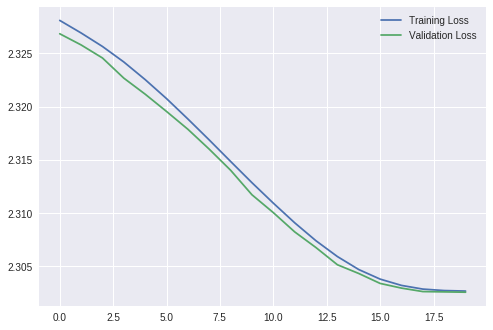

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label = "Training Loss")
plt.plot(test_losses,label= "Validation Loss")
plt.legend(frameon = False)